In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy --user
!{sys.executable} -m pip install pandas --user
!{sys.executable} -m pip install scikit-learn --user
!{sys.executable} -m pip install matplotlib --user
!{sys.executable} -m pip install xgboost --user

  Using cached https://files.pythonhosted.org/packages/c1/24/5fe7237b2eca13ee0cfb100bec8c23f4e69ce9df852a64b0493d49dae4e0/xgboost-0.90-py2.py3-none-manylinux1_x86_64.whl


load data

In [2]:
import pandas as pd

# making data frame from csv file 
data = pd.read_csv("../data/NACC.csv", index_col ="NACCID" )

#print number of columns
print("Original data set has %d samples and %d variables" %(data.shape[0], data.shape[1]))
  
# dropping passed columns 
data.drop(["NACCNEC", "NACCWRI1", "NACCWRI2", "NACCWRI3", "NACCINT", "NACCPICK","NACCCBD","NACCPROG", "NACCADC", "NACCMOD", "NACCYOD", "NACCAUTP", "NPFORMVER"], axis = 1, inplace = True) 

# clean data
data = data.query('NACCBRAA <= 7')

#print number of columns
print("After drop data set has %d samples and %d variables" %(data.shape[0], data.shape[1]))

# display
data

Original data set has 5636 samples and 30 variables
After drop data set has 5587 samples and 17 variables


,NPSEX,NACCNEUR,NACCDIFF,NACCVASC,NACCAMY,NACCINF,NACCHEM,NACCARTE,NACCLEWY,NACCPICK+,NACCCBD+,NACCPROG+,NACCPRIO,NACCDOWN,NACCOTHP,NACCDAGE,NACCBRAA
NACCID,,,,,,,,,,,,,,,,,
NACC000385,1,2,3,1,2,1,9,1,0,0,0,0,0,7,0,89,4
NACC000546,1,3,8,1,0,0,0,0,3,0,0,0,0,7,0,81,6
NACC000579,2,1,1,1,0,0,0,3,0,0,0,0,0,7,0,93,3
NACC000618,1,3,3,1,2,0,0,3,2,0,0,0,0,7,0,72,6
NACC000731,2,0,3,1,0,1,0,3,0,0,0,0,0,7,0,83,2
NACC001008,1,2,3,1,3,0,0,8,0,0,0,0,0,7,0,91,4
NACC001723,1,1,1,1,0,1,0,2,0,0,0,0,0,7,0,103,4
NACC002337,2,1,1,1,0,0,0,8,0,0,0,0,0,7,1,100,5
NACC002673,2,2,3,1,2,0,0,0,0,8,8,8,0,7,0,83,5


Prepare data

In [13]:
from sklearn.model_selection import train_test_split
X = data.values[:, :-2]
Y_age = data.values[:, -2] # age of death
Y_bra = data.values[:, -1] # braak stage

importances = [None]*3

Run Entropy

In [15]:
    from joblib import load
    import numpy as np
    
    try:
        clf = load("../ML/tree.model")
    except FileNotFoundError:
        raise Exception("RUN MACHINE LEARNING NOTEBOOK BEFORE")
        
    importances[0] = clf.feature_importances_
    importance_indices = np.argsort(importances[0])[::-1]
    labels = [data.columns[i] for i in importance_indices]

    # Print the feature ranking
    print("Feature ranking in Decision Tree Regressor:")

    for f in range(X.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, labels[f], importances[0][importance_indices[f]]))


Feature ranking in Decision Tree Regressor:
1. feature NACCNEUR (0.840330)
2. feature NACCARTE (0.047707)
3. feature NACCDIFF (0.028498)
4. feature NACCAMY (0.024024)
5. feature NACCPRIO (0.018069)
6. feature NACCPICK+ (0.009506)
7. feature NACCLEWY (0.007570)
8. feature NACCCBD+ (0.006176)
9. feature NACCHEM (0.005471)
10. feature NPSEX (0.005159)
11. feature NACCPROG+ (0.003833)
12. feature NACCOTHP (0.001872)
13. feature NACCINF (0.001784)
14. feature NACCDOWN (0.000000)
15. feature NACCVASC (0.000000)


Run Gradient

In [16]:
    from xgboost import XGBClassifier
    clf = XGBClassifier()
    clf.fit(X, Y_bra)

    importances[1] = clf.feature_importances_
    importance_indices = np.argsort(importances[1])[::-1]
    labels = [data.columns[i] for i in importance_indices]

    # Print the feature ranking
    print("Feature ranking in XGBoost:")

    for f in range(X.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, labels[f], importances[1][importance_indices[f]]))

Feature ranking in XGBoost:
1. feature NACCNEUR (0.482630)
2. feature NACCPRIO (0.085821)
3. feature NACCARTE (0.055825)
4. feature NACCPICK+ (0.048441)
5. feature NACCDIFF (0.045270)
6. feature NACCAMY (0.043648)
7. feature NACCPROG+ (0.034786)
8. feature NACCLEWY (0.033976)
9. feature NACCINF (0.031564)
10. feature NACCCBD+ (0.029471)
11. feature NACCOTHP (0.029249)
12. feature NACCHEM (0.026003)
13. feature NPSEX (0.022226)
14. feature NACCVASC (0.020145)
15. feature NACCDOWN (0.010946)


In [17]:
    from sklearn.decomposition import PCA
    pca = PCA()
    pca.fit(X)
    res = pca.transform(np.eye(X.shape[1]))
    pca_import = np.sum(res, 1)
    pca_import = pca_import - pca_import.min(axis=0)
    pca_import = pca_import/pca_import.sum(axis=0)
    importances[2] = pca_import
    importance_indices = np.argsort(importances[2])[::-1]
    labels = [data.columns[i] for i in importance_indices]

    # Print the feature ranking
    print("Feature ranking in XGBoost:")

    for f in range(X.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, labels[f], importances[2][importance_indices[f]]))

Feature ranking in XGBoost:
1. feature NACCVASC (0.107059)
2. feature NACCLEWY (0.095719)
3. feature NACCAMY (0.093001)
4. feature NACCPICK+ (0.089047)
5. feature NACCOTHP (0.088547)
6. feature NACCCBD+ (0.087957)
7. feature NACCINF (0.087148)
8. feature NACCPRIO (0.086236)
9. feature NACCHEM (0.075084)
10. feature NACCARTE (0.064949)
11. feature NACCDIFF (0.064060)
12. feature NACCNEUR (0.039042)
13. feature NACCPROG+ (0.022072)
14. feature NPSEX (0.000081)
15. feature NACCDOWN (0.000000)


Plot Results

<IPython.core.display.Javascript object>


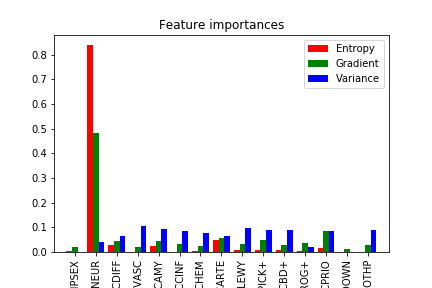

In [24]:
    import matplotlib.pyplot as plt
    
    %matplotlib notebook
    
    plt.title("Feature importances")
    width = 0.27
    list_indices = np.array(range(X.shape[1]))
    entropy =   plt.bar(list_indices - width, importances[0][list_indices], width, color="r")
    xgb =       plt.bar(list_indices, importances[1][list_indices],  width, color="g")
    pca =       plt.bar(list_indices + width, importances[2][list_indices],  width, color="b")
    plt.xticks(range(X.shape[1]), data.columns)
    plt.xticks(rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.legend((entropy[0], xgb[0], pca[0]), ('Entropy', 'Gradient', 'Variance'))
    
    